<a href="https://github.com/DoddyRafael/Tarea/blob/master/DesGraVec-exam.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D 
import pandas as pd
#from pandas.compat import StringIO

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#df=pd.read_csv(StringIO(data),names=["C1","C2","C3"]) #pasa los datos de string a frame haasta string lo hace recorrdido, con names le da nombre a las columnas
#pd.read_csv("ruta/al/archivo",header=none)

In [0]:
def calculaCosto(x,z,theta):
  m = z.size
  J = 0
  h = np.dot(x, theta) 
  J = (1./(2*m))*np.sum(np.square(h-z[::,0])) 
  return J

In [0]:
def desGrad(X, z, theta, alpha, num_iters):
    
    X = np.append(np.ones(X.shape[0]).reshape(-1,1),X,axis=1)
    
    theta =np.ones(X.shape[1])
  
    m = z.shape[0]
  
    theta = theta.copy()
  
    J_historico =[]
  
    for it in range(num_iters):
    
        theta = theta-(alpha/m)*(np.dot(X,theta)-z[::,0]).dot(X)
        J_historico.append(calculaCosto(X,z,theta))
  
    return theta,J_historico

In [0]:
def desGrad2(X, z, theta, alpha, num_iters):
  
    m = z.shape[0]
  
    theta = theta.copy()
  
    J_historico =[]
  
    for it in range(num_iters):
    
        theta = theta-(alpha/m)*(np.dot(X,theta)-z[::,0]).dot(X)
        J_historico.append(calculaCosto(X,z,theta))
  
    return theta,J_historico

# Prueba con ajuste a recta

In [0]:
def f(x):

  return 2*x+0.5+0.3*np.random.random(x.shape)

In [0]:
x = np.random.random((50,1))
y = f(x)

In [0]:
Regr = LinearRegression().fit(x,y)

In [0]:
y_regr = Regr.predict(x)
m_regr = Regr.coef_[0][0]
b_regr = Regr.intercept_[0] 

In [0]:
x = np.append(np.ones(x.shape[0]).reshape(-1,1),x,axis=1)

In [0]:
x.shape

(50, 2)

In [0]:
theta =np.random.rand(x.shape[1])

In [0]:
theta

array([0.86690634, 0.43810058])

In [0]:
y_desc = np.dot(x,theta).reshape(-1,1);

In [0]:
theta_desc, errores=desGrad2(x, y, theta, 0.01,10000)

In [0]:
theta_desc

array([0.65180822, 2.02702956])

In [0]:
y_desc = np.dot(x,theta_desc).reshape(-1,1);

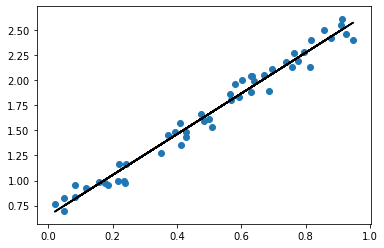

In [0]:
plt.plot(x[:,1], y_desc)
plt.scatter(x[:,1], y)
plt.plot(x[:,1], y_regr, color="black")

#Energydata

In [0]:
FFcomp=pd.read_csv("/content/energydata_complete.csv")

In [0]:
FFcomp;

In [0]:
FF = FFcomp.drop(["date","lights","rv1","rv2"],axis=1)

In [0]:
FF=(FF-FF.mean())/FF.std()

In [0]:
y = np.array(FF["Appliances"]).reshape(-1,1)

In [0]:
x = np.array(FF.drop(["Appliances"],axis=1)).reshape(-1,24)

In [0]:
x = np.append(np.ones(x.shape[0]).reshape(-1,1),x,axis=1)

In [0]:
theta=np.random.rand(x.shape[1])

In [0]:
theta_desc, Jhist=desGrad2(x, y, theta, 0.001,1000)

In [0]:
m=FF.shape[0]

In [0]:
m1=int(0.7*FF.shape[0])
m2=FF.shape[0]-int(0.7*FF.shape[0])
print(m1,m2)

13814 5921


In [0]:
Prueba = FF.drop(range(m2,m),axis=0)

In [0]:
Prueba

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,-0.367666,-1.118616,1.843774,-0.520398,1.073656,-1.235032,1.686087,-0.908194,1.506399,-1.314870,0.471148,-0.145193,0.951774,-1.453610,1.219830,-1.957459,1.141543,-1.217293,0.958112,-0.152643,-2.976252,0.822060,1.207663,2.091543,0.366966
1,-0.367666,-1.118616,1.616766,-0.520398,1.057071,-1.235032,1.704523,-0.908194,1.604488,-1.314870,0.471148,-0.176937,0.945568,-1.453610,1.206795,-1.957459,1.134525,-1.200748,0.965338,-0.174583,-2.962738,0.822060,1.071676,1.766539,0.343126
2,-0.465204,-1.118616,1.517921,-0.520398,1.033523,-1.235032,1.748563,-0.944091,1.580878,-1.314870,0.458956,-0.221816,0.916461,-1.453610,1.182027,-1.957459,1.109004,-1.233838,0.950886,-0.196524,-2.949223,0.822060,0.935690,1.441535,0.319286
3,-0.465204,-1.118616,1.459284,-0.520398,1.024514,-1.235032,1.769047,-0.962039,1.542487,-1.314870,0.458956,-0.242614,0.925022,-1.485205,1.154001,-2.008580,1.082206,-1.233838,0.926798,-0.218464,-2.935709,0.822060,0.799703,1.116531,0.295446
4,-0.367666,-1.118616,1.526298,-0.520398,1.009771,-1.235032,1.769047,-0.962039,1.497953,-1.296799,0.458956,-0.253561,0.972213,-1.453610,1.142269,-2.008580,1.082206,-1.233838,0.926798,-0.240405,-2.922194,0.822060,0.663716,0.791527,0.271606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,0.607706,0.195153,2.548253,0.300405,1.436490,-0.238078,1.982081,0.592952,1.320588,-0.537837,0.796352,0.605723,0.870523,-0.937020,1.820771,0.167450,1.250010,-0.543913,1.245358,0.731246,-0.097656,0.419404,2.431543,0.141518,1.272882
5917,2.168303,0.195153,2.514746,0.315605,1.501194,-0.204846,2.107033,0.560318,1.320588,-0.537837,0.816335,0.605723,0.884979,-0.937020,1.820771,0.240723,1.267875,-0.543913,1.247164,0.718709,-0.099909,0.475329,2.363550,-0.056311,1.288776
5918,1.388005,0.215908,2.154549,0.346005,1.501194,-0.188230,2.126493,0.506473,1.360514,-0.537837,0.825836,0.593994,0.902580,-0.937020,1.820771,0.279063,1.251605,-0.543913,1.239938,0.706171,-0.102161,0.531253,2.295556,-0.254139,1.304669
5919,2.363378,0.298926,1.987015,0.368805,1.481537,-0.188230,2.065041,0.506473,1.406583,-0.537837,0.825836,0.571242,0.946745,-0.937020,1.826637,0.291844,1.250010,-0.577003,1.239938,0.693634,-0.104414,0.587177,2.227563,-0.451968,1.320562


In [0]:
Entrenamiento = FF.drop(range(0,m2),axis=0)

In [0]:
Entrenamiento

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
5921,2.948601,0.357039,1.684617,0.432646,1.387348,-0.188230,1.943161,0.457522,1.459563,-0.537837,0.815385,0.529536,1.015766,-0.937020,1.859877,0.291844,1.262132,-0.543913,1.261617,0.668559,-0.108918,0.699026,2.091576,-0.847625,1.352349
5922,1.290468,0.375719,1.601688,0.478246,1.302987,-0.188230,1.880685,0.457522,1.491043,-0.537837,0.807658,0.518934,1.036450,-0.905425,1.859877,0.358300,1.250010,-0.543913,1.261617,0.656022,-0.111171,0.754950,2.023583,-1.045454,1.368242
5923,0.412632,0.375719,1.532999,0.478246,1.255483,-0.151675,1.839717,0.457522,1.504864,-0.537837,0.792109,0.507206,1.058335,-0.921222,1.879431,0.388973,1.223212,-0.543913,1.279281,0.646619,-0.111171,0.777320,1.955590,-0.508490,1.368242
5924,0.022483,0.396473,1.457609,0.528406,1.239921,-0.133398,1.787483,0.442837,1.511774,-0.483625,0.791475,0.491725,1.069103,-0.889627,1.879431,0.388973,1.210451,-0.543913,1.304172,0.637216,-0.111171,0.799690,1.887596,0.028473,1.368242
5925,-0.270129,0.437982,1.425777,0.528406,1.190779,-0.133398,1.737553,0.442837,1.511774,-0.506859,0.776591,0.483234,1.078752,-0.889627,1.885297,0.388973,1.184930,-0.543913,1.288113,0.627812,-0.111171,0.822060,1.819603,0.565437,1.368242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.022483,2.415901,1.583259,2.530254,0.394439,2.458683,0.590195,1.881979,1.511774,1.955897,0.160797,2.772540,-1.721009,2.006117,1.781664,1.365374,1.366260,1.843525,1.261617,2.881416,-0.043598,-1.616241,-0.288190,-1.243282,2.282105
19731,-0.075055,2.374391,1.568181,2.468238,0.407778,2.425451,0.608630,1.881979,1.511774,1.972161,0.152669,2.674023,-1.721009,2.033199,1.764904,1.365374,1.311899,1.843525,1.261617,2.856342,-0.043598,-1.593871,-0.220197,-1.172629,2.274158
19732,1.680617,2.374391,1.592473,2.411042,0.576968,2.383911,0.752018,1.881979,1.544022,1.972161,0.146019,2.580432,-1.721009,2.025074,1.762111,1.365374,1.287016,1.843525,1.261617,2.831267,-0.043598,-1.571502,-0.152204,-1.101976,2.266212
19733,3.143676,2.374391,1.691318,2.313197,0.642678,2.304155,0.629114,1.881979,1.557843,1.955897,0.138629,2.384494,-1.721009,2.006117,1.741719,1.346204,1.259979,1.843525,1.268241,2.806192,-0.043598,-1.549132,-0.084210,-1.031323,2.258265


In [0]:
ye = np.array(Entrenamiento["Appliances"]).reshape(-1,1)

In [0]:
xe = np.array(Entrenamiento.drop(["Appliances"],axis=1)).reshape(-1,24)

In [0]:
xe = np.append(np.ones(xe.shape[0]).reshape(-1,1),xe,axis=1)

#a) dimensiones de los datos, tomando encuenta la columna de la ordenada al origen

In [0]:
xe.shape

(13814, 25)

#b) Así, el número de parámetros debe ser el numero de columna 25

In [0]:
theta_e=np.random.rand(xe.shape[1])

In [0]:
theta_e.shape

(25,)

In [0]:
theta_e_desc, Jhist_e=desGrad2(xe, ye, theta_e, 0.001,1000)

In [0]:
theta_e_desc.shape

(25,)

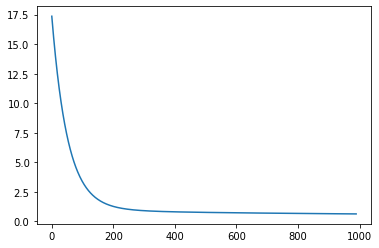

In [0]:
plt.plot(Jhist_e[10::])

#DAtos entrenamiento datos prueba

In [0]:
yp = np.array(Prueba["Appliances"]).reshape(-1,1)
yp.shape

(5921, 1)

In [0]:
xp = np.array(Prueba.drop(["Appliances"],axis=1)).reshape(-1,24)
xp.shape

(5921, 24)

In [0]:
xp = np.append(np.ones(xp.shape[0]).reshape(-1,1),xp,axis=1)
xp.shape

(5921, 25)

In [0]:
yp_pred = np.dot(xp,theta_e_desc).reshape(-xp.shape[0],1)
yp_pred.shape

(5921, 1)

In [0]:
error_E_P=(yp-yp_pred)**2

In [0]:
np.sum(error_E_P)/error_E_P.shape[0]

3.484590855966682

In [0]:
np.mean(error_E_P)

3.484590855966682

#c) valores de los parámetros

In [0]:
theta_desc

array([ 0.06134188,  0.24307037, -0.00666379, -0.01274302,  0.10523505,
        0.26709001, -0.21102983,  0.20614499, -0.22648658,  0.02341011,
        0.04486596,  0.45293925,  0.89061311,  0.35358119, -0.13457606,
       -0.15207029, -0.24085793, -0.09747358, -0.00089189,  0.09918939,
        0.62993226,  0.44523207,  0.63936306,  0.2933678 , -0.10463633])

#d) función costo en función de las iteraciones

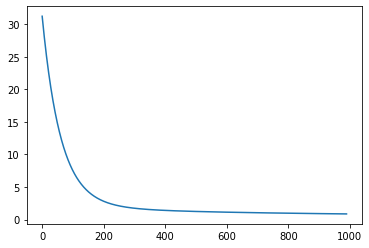

In [0]:
plt.plot(Jhist[10::])
